In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
bommov = pd.read_csv('data/zippedData/bom.movie_gross.csv')

imdbnambas = pd.read_csv('data/zippedData/imdb.name.basics.csv')


imdbtitaka = pd.read_csv('data/zippedData/imdb.title.akas.csv')


imdbtitcrw = pd.read_csv('data/zippedData/imdb.title.basics.csv')


imdbtitprn = pd.read_csv('data/zippedData/imdb.title.principals.csv')


imdbtitrat = pd.read_csv('data/zippedData/imdb.title.ratings.csv')


rtmovinf = pd.read_csv('data/zippedData/rt.movie_info.tsv', sep='\t')

rtreviews = pd.read_csv('data/zippedData/rt.reviews.tsv', sep='\t', encoding='ISO-8859-1')


tmdbmovies = pd.read_csv('data/zippedData/tmdb.movies.csv')


tnmovbud = pd.read_csv('data/zippedData/tn.movie_budgets.csv')

In [30]:
bommov.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [31]:
bommov.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
bommov.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


**To fill NaN with 0 valuesso we can still perform calculations on these fields and change from data type from object to numeric.**

In [33]:
bommov['foreign_gross'] = bommov['foreign_gross'].fillna(0)

In [34]:
bommov['foreign_gross'] = pd. to_numeric(bommov['foreign_gross'], errors = 'coerce')

**Acquiring the unique year info from the database**



In [11]:
bommov.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

**Figure out top 10 studios and print detail by studio**

In [35]:
studio10 = bommov.groupby('studio').sum().sort_values('domestic_gross',ascending=False).head(10)
studio10

,domestic_gross,foreign_gross,year
studio,,,
BV,1.841903e+10,2.579385e+10,213451
Uni.,1.290239e+10,1.685477e+10,296082
WB,1.216805e+10,1.866790e+10,281941
Fox,1.094950e+10,2.005587e+10,273882
Sony,8.459683e+09,1.394535e+10,221575
Par.,7.685871e+09,1.186338e+10,203417
LGF,4.118963e+09,4.482619e+09,207437
WB (NL),3.995700e+09,6.339000e+09,90644
LG/S,2.078200e+09,3.353724e+09,82599


In [37]:
studio_list = ['BV', 'Uni.', 'WB', 'Fox', 'Sony', 'Par.', 'LGF', 'WB (NL)', 'LG/S',
       'P/DW']
bommov10 = bommov[bommov['studio'].isin(studio_list)]
bommov10.studio.unique()

array(['BV', 'WB', 'P/DW', 'Par.', 'Uni.', 'Fox', 'Sony', 'WB (NL)',
       'LGF', 'LG/S'], dtype=object)

In [38]:
bommov['world_wide_gross'] = bommov['domestic_gross']+bommov['foreign_gross']

In [39]:
bommov.head()

,title,studio,domestic_gross,foreign_gross,year,world_wide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


**code to acquire year by year performance of the studios and graph them.  Used World-wide graphs from draft Jupyter notebook.**


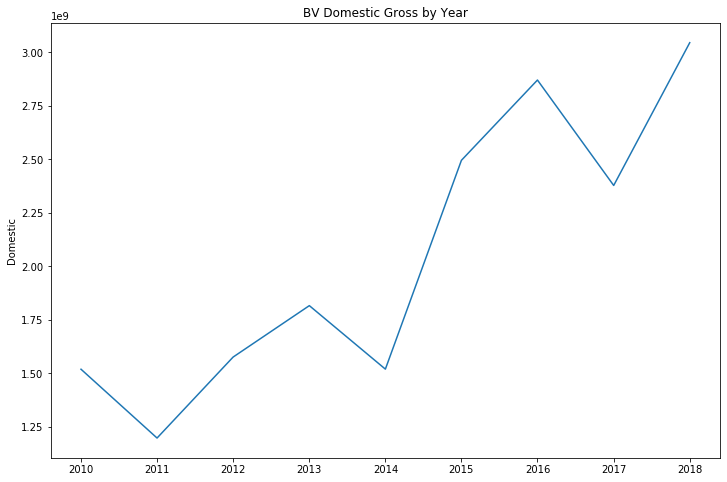

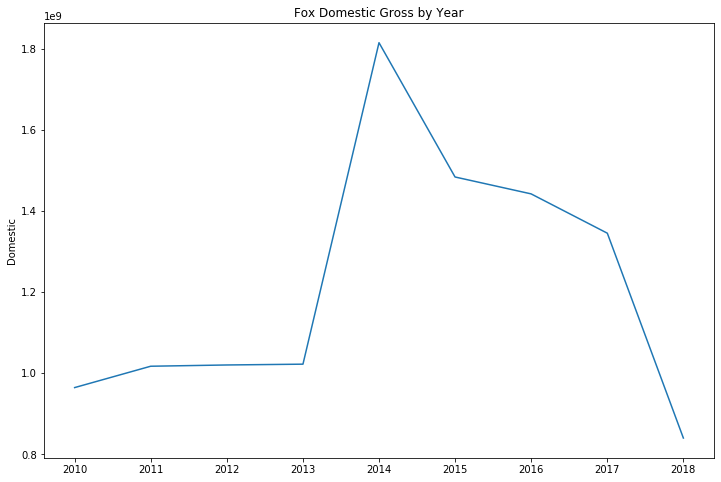

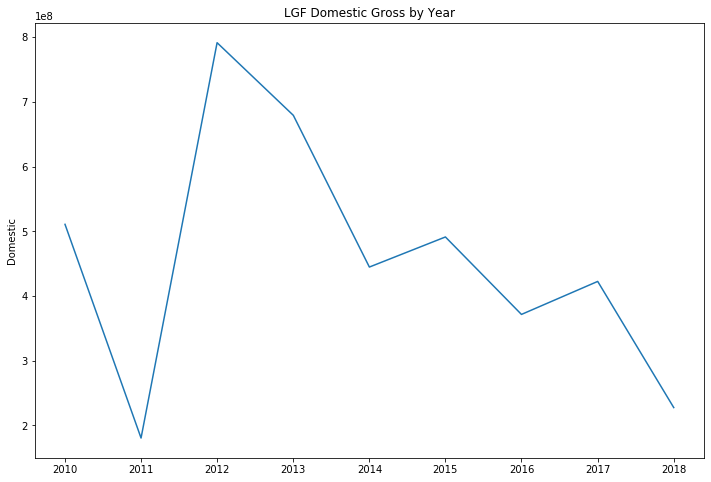

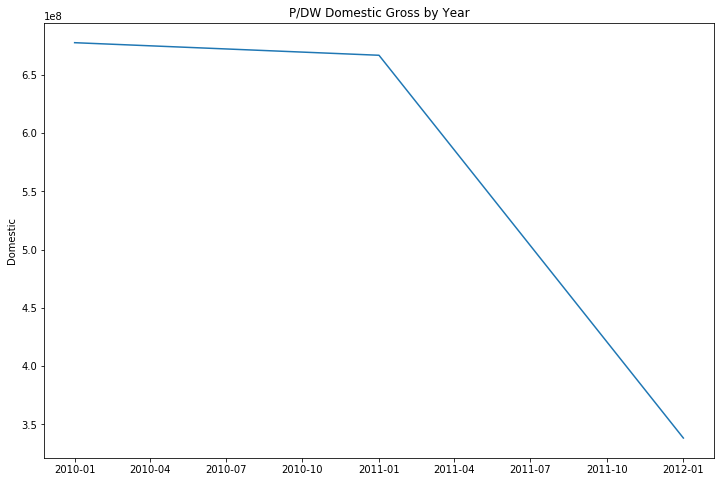

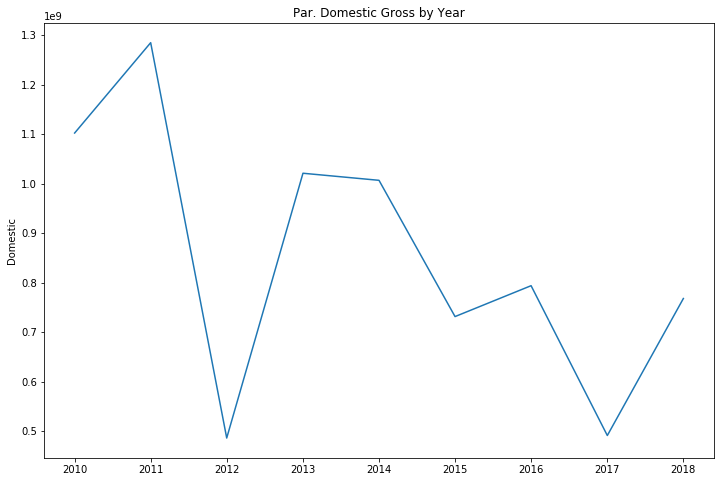

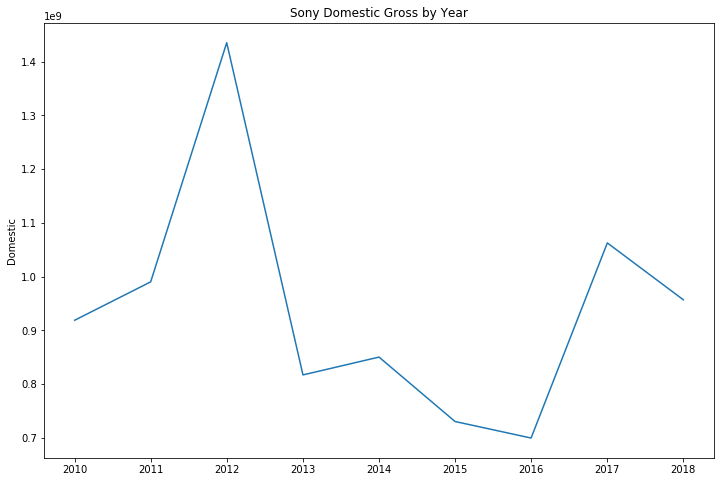

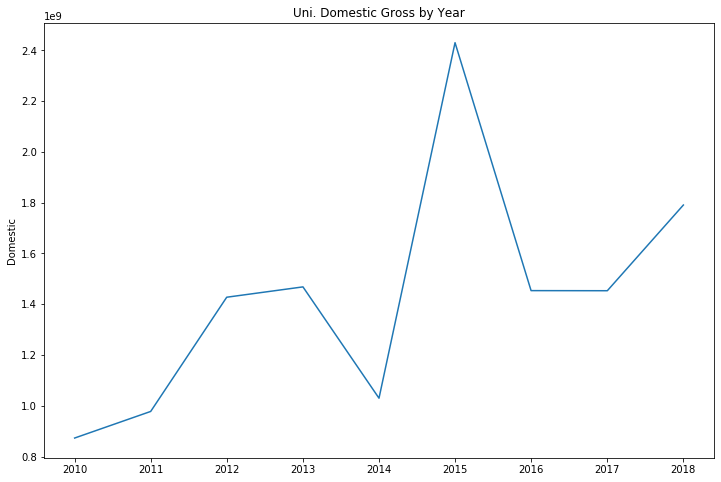

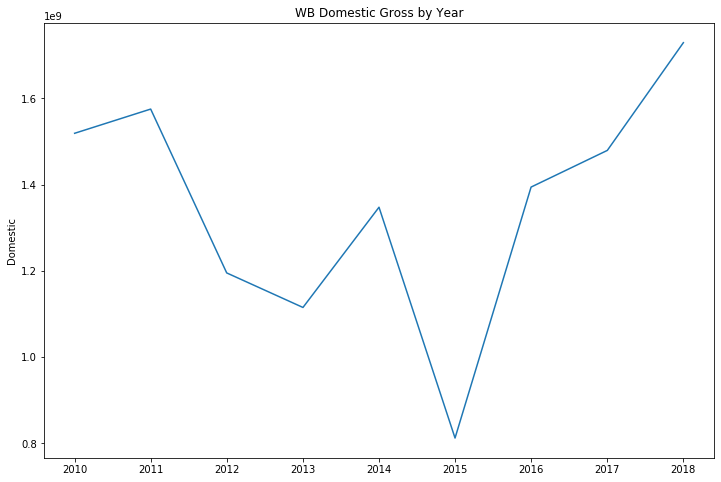

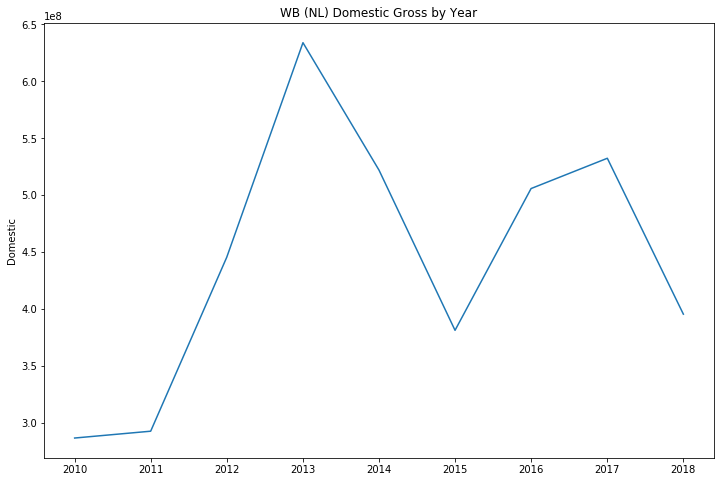

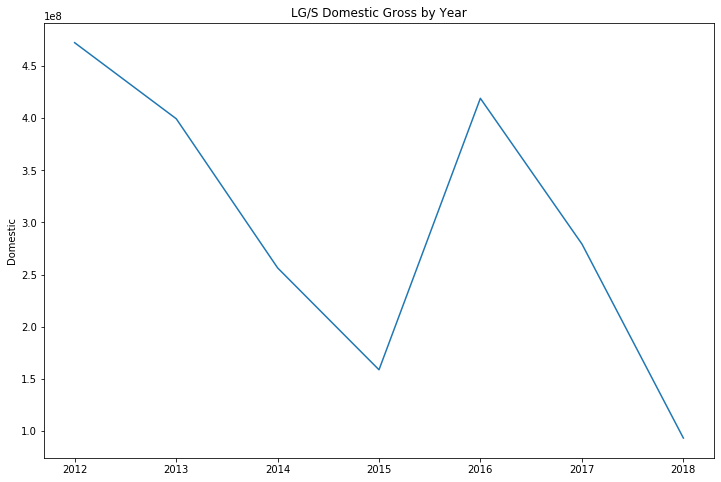

In [40]:
dfs = []
for year in bommov10.year.unique():             
    c = bommov10[bommov10.year == year].groupby('studio').sum()
    c['year'] = year
    dfs.append(c)
x = pd.concat(dfs).reset_index()
x.year = pd.to_datetime(x.year, format = '%Y')
x.set_index('year', inplace = True)
for studio in x.studio.unique():
    plt.figure(figsize=(12,8))
    plt.plot(x[x.studio == studio].domestic_gross)
    plt.ylabel('Domestic')
    
    plt.title(studio + ' Domestic Gross by Year')
    plt.show()

**To calculate domestic and foreign gross percentage for 2017 and 2018 and see the data throughout the years from 2010 - 2018.**

In [41]:
bommov.groupby('year').sum()

,domestic_gross,foreign_gross,world_wide_gross
year,,,
2010,1.015693e+10,1.437426e+10,2.452960e+10
2011,1.006416e+10,1.567099e+10,2.573033e+10
2012,1.087661e+10,1.703789e+10,2.787959e+10
2013,1.079233e+10,1.661239e+10,2.737257e+10
2014,1.033774e+10,1.697197e+10,2.729441e+10
2015,1.105141e+10,1.520395e+10,2.426376e+10
2016,1.125365e+10,1.911904e+10,3.023504e+10
2017,1.093327e+10,2.005093e+10,3.063620e+10
2018,1.109121e+10,1.747449e+10,2.788690e+10


**To graph worldwide Gross Collections by top 10 studios.**


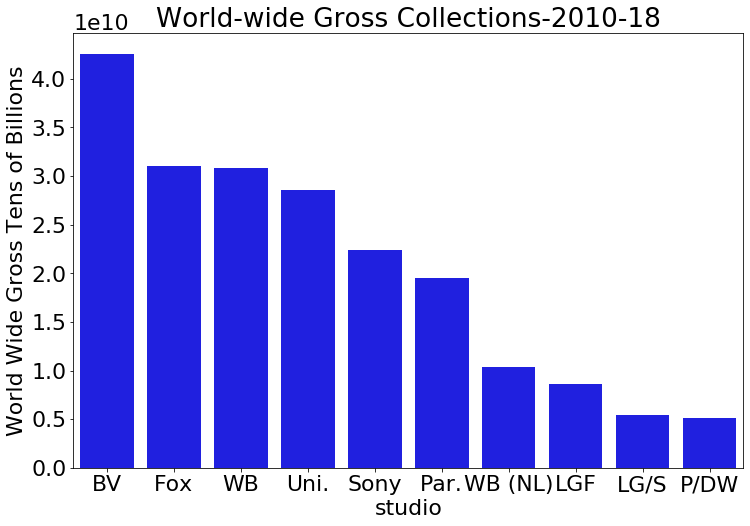

In [334]:
plt.figure(figsize=(12,8))
studio10ten = bommov.groupby('studio').sum().sort_values('world-wide gross',ascending=False).head(10)
sns.barplot(x=studio10ten.index, y = studio10ten['world-wide gross'], color = 'blue')

plt.title('World-wide Gross Collections-2010-18')

plt.ylabel('World Wide Gross Tens of Billions')
plt.rcParams.update({'font.size': 22})
plt.savefig('top10stuwwg.png')

In [140]:

studio10ten

,domestic_gross,foreign_gross,year,world-wide gross
studio,,,,
BV,1.841903e+10,2.579385e+10,213451,4.421288e+10
Fox,1.094950e+10,2.005587e+10,273882,3.100537e+10
WB,1.216805e+10,1.866790e+10,281941,3.083595e+10
Uni.,1.290239e+10,1.685477e+10,296082,2.975716e+10
Sony,8.459683e+09,1.394535e+10,221575,2.240492e+10
Par.,7.685871e+09,1.186338e+10,203417,1.954926e+10
WB (NL),3.995700e+09,6.339000e+09,90644,1.033470e+10
LGF,4.118963e+09,4.482619e+09,207437,8.594583e+09
LG/S,2.078200e+09,3.353724e+09,82599,5.431924e+09


In [115]:
imdbtitcrw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [110]:
imdbtitcrw.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [44]:
imdbtitcrw.sample(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
28373,tt2099701,Reel Old School,Reel Old School,2011,86.0,"Documentary,Music"
29073,tt2118707,Pretty Perfect,Pretty Perfect,2014,98.0,"Drama,Romance,Thriller"
38777,tt2389136,Other Seven Ways,Other Seven Ways,2014,NaN,Documentary
7589,tt1436036,A Life Ascending,A Life Ascending,2010,58.0,Documentary
103723,tt6077450,The Man Known as Keith Murray,The Man Known as Keith Murray,2016,NaN,Documentary


**To write code to get genre information to see what are the popular types**


In [49]:
imdbtitcrw['genres'] = imdbtitcrw['genres'].astype(str)
count = {}
for item in imdbtitcrw['genres']:
    genre_split = item.split(',')
    for item in genre_split:
        if item not in count:
            count[item] = 1
        else:
            count[item] += 1
                
print(count)

{'Action': 10335, 'Crime': 6753, 'Drama': 49883, 'Biography': 8722, 'Comedy': 25312, 'Fantasy': 3516, 'Horror': 10805, 'Thriller': 11883, 'Adventure': 6465, 'Animation': 2799, 'Documentary': 51640, 'History': 6225, 'nan': 5408, 'Mystery': 4659, 'Sci-Fi': 3365, 'Romance': 9372, 'Family': 6227, 'War': 1405, 'Music': 4314, 'Sport': 2234, 'Western': 467, 'Musical': 1430, 'Adult': 25, 'News': 1551, 'Talk-Show': 50, 'Reality-TV': 98, 'Game-Show': 4, 'Short': 11}


To breakdown genres populartity and graph

In [50]:

listoftuples = sorted(count.items(), key=lambda x: x[1], reverse = True)
listoftuples

[('Documentary', 51640),
 ('Drama', 49883),
 ('Comedy', 25312),
 ('Thriller', 11883),
 ('Horror', 10805),
 ('Action', 10335),
 ('Romance', 9372),
 ('Biography', 8722),
 ('Crime', 6753),
 ('Adventure', 6465),
 ('Family', 6227),
 ('History', 6225),
 ('nan', 5408),
 ('Mystery', 4659),
 ('Music', 4314),
 ('Fantasy', 3516),
 ('Sci-Fi', 3365),
 ('Animation', 2799),
 ('Sport', 2234),
 ('News', 1551),
 ('Musical', 1430),
 ('War', 1405),
 ('Western', 467),
 ('Reality-TV', 98),
 ('Talk-Show', 50),
 ('Adult', 25),
 ('Short', 11),
 ('Game-Show', 4)]

To make list to use for graph.                                                                                                           

In [51]:
genrekey = map(lambda x: x[0],listoftuples)

genrekey = list(genrekey)
genrekey10=genrekey[0:10]
genrekey10

['Documentary',
 'Drama',
 'Comedy',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Biography',
 'Crime',
 'Adventure']

In [52]:
genrevalue = map(lambda x: x[1],listoftuples)
genrevalue = list(genrevalue)
genrevalue10 = genrevalue[0:10]
genrevalue10

[51640, 49883, 25312, 11883, 10805, 10335, 9372, 8722, 6753, 6465]

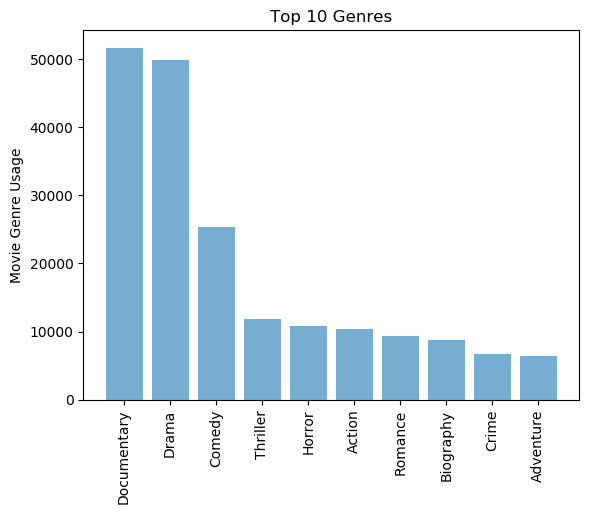

In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

Genre = ('Documentary','Drama', 'Comedy', 'Thriller', 'Horror', 'Action', 'Romance', 'Biography', 'Crime', 'Adventure')
 
y_pos = np.arange(len(Genre))
gen_usage = [51640, 49883, 25312, 11883, 10805, 10335, 9372, 8722, 6753, 6465]

plt.bar(y_pos, gen_usage, align='center', alpha=0.6)
plt.xticks(y_pos, Genre)
plt.ylabel('Movie Genre Usage')
plt.title('Top 10 Genres')
plt.savefig('top10GEN.png')
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 22})
          
plt.show()

In [145]:
rtmovinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [136]:
rtmovinf.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [62]:
rtmovinf['box_office'] = rtmovinf['box_office'].fillna(0)
rtmovinf['box_office'] = rtmovinf['box_office'].map(lambda x: str(x).replace(',',''))
rtmovinf['box_office'] = rtmovinf['box_office'].astype(int)

In [63]:
rtmovinf.head(1)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,0,104 minutes,NaN


In [65]:
#rtmovinf.box_office.value_counts()


**Write Code for calculation genre with the box office collections**


In [74]:
rtmovinf['genre'] = rtmovinf['genre'].astype(str)
count1 = {}
for i, item in enumerate (rtmovinf['genre']):
    genre_split = item.split('|')
    for genre in genre_split:
        if genre not in count1:
            count1[genre] = rtmovinf['box_office'][i]
        else:
            count1[genre] += rtmovinf['box_office'][i]
                
print(count1)

{'Action and Adventure': 4923971272, 'Classics': 13500000, 'Drama': 5650752137, 'Science Fiction and Fantasy': 2590331921, 'Musical and Performing Arts': 185740407, 'Mystery and Suspense': 2808624972, 'Romance': 2027197107, 'Kids and Family': 1750399084, 'Comedy': 5657979590, 'nan': 0, 'Documentary': 177847158, 'Special Interest': 27914489, 'Art House and International': 75551321, 'Horror': 712413370, 'Western': 86617011, 'Television': 40370515, 'Sports and Fitness': 42483358, 'Animation': 1067656699, 'Faith and Spirituality': 16142356, 'Cult Movies': 13900000, 'Anime and Manga': 0, 'Gay and Lesbian': 0}


In [76]:
listoftuples1 = sorted(count1.items(), key=lambda x: x[1], reverse = True)
listoftuples1

[('Comedy', 5657979590),
 ('Drama', 5650752137),
 ('Action and Adventure', 4923971272),
 ('Mystery and Suspense', 2808624972),
 ('Science Fiction and Fantasy', 2590331921),
 ('Romance', 2027197107),
 ('Kids and Family', 1750399084),
 ('Animation', 1067656699),
 ('Horror', 712413370),
 ('Musical and Performing Arts', 185740407),
 ('Documentary', 177847158),
 ('Western', 86617011),
 ('Art House and International', 75551321),
 ('Sports and Fitness', 42483358),
 ('Television', 40370515),
 ('Special Interest', 27914489),
 ('Faith and Spirituality', 16142356),
 ('Cult Movies', 13900000),
 ('Classics', 13500000),
 ('nan', 0),
 ('Anime and Manga', 0),
 ('Gay and Lesbian', 0)]

In [77]:
genrekey1 = map(lambda x: x[0],listoftuples1)

genrekey1 = list(genrekey1)
genrekey110=genrekey1[0:10]
genrekey110

['Comedy',
 'Drama',
 'Action and Adventure',
 'Mystery and Suspense',
 'Science Fiction and Fantasy',
 'Romance',
 'Kids and Family',
 'Animation',
 'Horror',
 'Musical and Performing Arts']

In [78]:
genrevalue1 = map(lambda x: x[1],listoftuples1)

genrevalue1 = list(genrevalue1)
genrevalue110=genrevalue1[0:10]
sorted(genrevalue110)


[185740407,
 712413370,
 1067656699,
 1750399084,
 2027197107,
 2590331921,
 2808624972,
 4923971272,
 5650752137,
 5657979590]

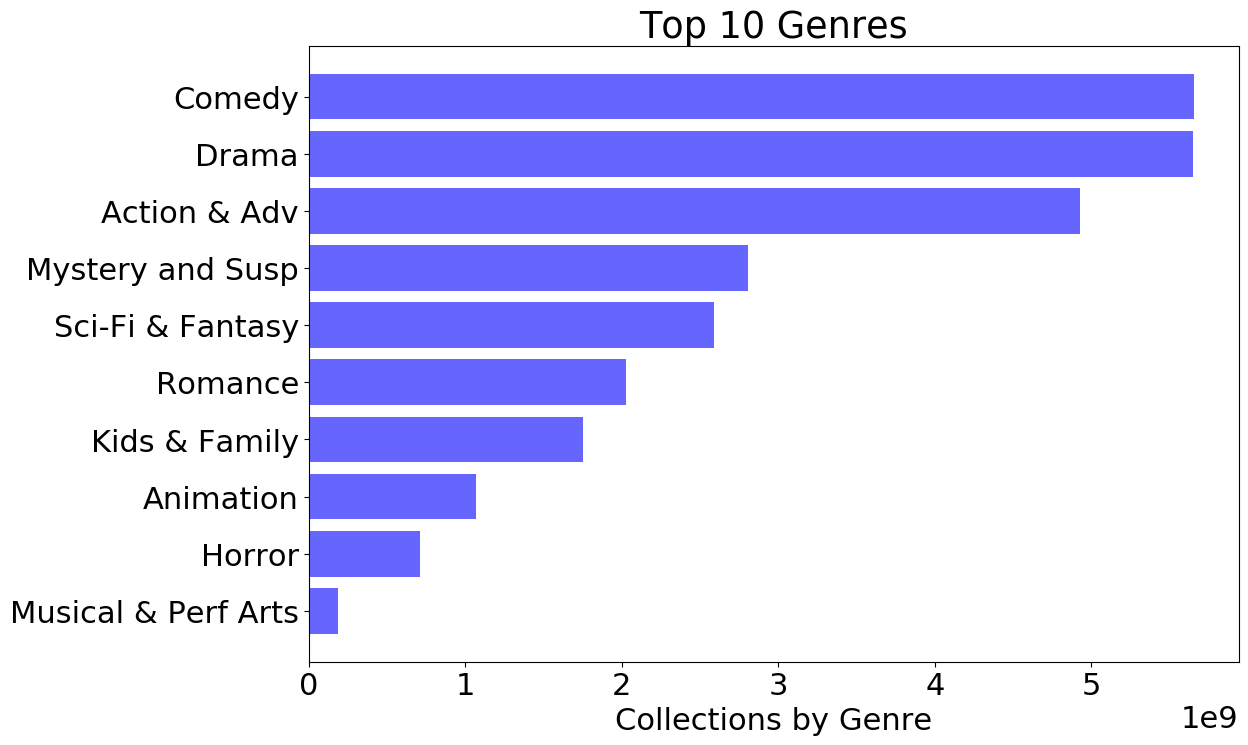

In [117]:
plt.figure(figsize=(12,8))

Genre = ('Musical & Perf Arts','Horror','Animation','Kids & Family','Romance','Sci-Fi & Fantasy','Mystery and Susp','Action & Adv','Drama','Comedy')
 
y_pos = np.arange(len(Genre))
gen_usage = [185740407, 712413370, 1067656699, 1750399084, 2027197107, 2590331921,2808624972,4923971272, 5650752137,5657979590]

plt.barh(y_pos, gen_usage, align='center', alpha=0.6, color = 'blue')
plt.yticks(y_pos, Genre)
plt.xlabel('Collections by Genre')
plt.title('Top 10 Genres')
plt.savefig('top10GENinc.png')
#plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 22})
          
plt.show()

**To calculate top directors**

In [67]:
#rtmovinf.groupby('director').sum().sort_values('box_office', ascending=False).head(10)

In [68]:
#rtmovinf.box_office.value_counts()

In [42]:
rtreviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [43]:
rtreviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [49]:
tmdbmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [50]:
tmdbmovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [86]:
tnmovbud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [87]:
tnmovbud.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [88]:
tnmovbud['production_budget'] = tnmovbud['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)

In [89]:
tnmovbud['domestic_gross'] = tnmovbud['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [90]:
tnmovbud['worldwide_gross'] = tnmovbud['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [91]:
tnmovbud.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [92]:
tnmovbud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB



**To Calculate top 10 movies by worldwide_gross**

In [93]:
top10movies = tnmovbud.sort_values(by='worldwide_gross', ascending = False).head(10)
top10movies


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


**Return on Investment for worldwide_gross on top 10 worldwide releases

In [130]:
top10movieswwrwwroi = (top10movies['worldwide_gross']/top10movies['production_budget'])
top10movieswwrwwroi

0       6.532577
42     11.041042
5       6.710167
6       6.827114
33      7.669092
66      7.993278
26      6.746382
3       4.243841
41      6.741291
260    10.733545
dtype: float64

**Return on Investment for domestic_gross on top 10 worldwide releases

In [129]:
top10movieswwrdmroi = (top10movies['domestic_gross']/top10movies['production_budget'])
top10movieswwrdmroi

0      1.789430
42     3.296820
5      3.060988
6      2.262718
33     3.033817
66     1.857932
26     2.770131
3      1.388403
41     3.500298
260    3.049545
dtype: float64

In [94]:
worldwide = top10movies['worldwide_gross']

In [95]:
domestic = top10movies['domestic_gross']

In [96]:
budget = top10movies['production_budget']

**To Calculate Domestic realeases only step 1

In [97]:
tnmovbud['foreign']= tnmovbud['domestic_gross'] - tnmovbud['worldwide_gross']


In [98]:
tnmovbud.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
foreign               int64
dtype: object

**To calculate domestic releases only Step 2, sort, and graph**

In [99]:
tnmovbuddom = tnmovbud[tnmovbud['foreign'] >= 0].sort_values(by='domestic_gross', ascending=False).head(10)
tnmovbuddom

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign
5117,18,"Dec 21, 1937",Snow White and the Seven Dwarfs,1488000,184925486,184925486,0
2994,95,"Dec 17, 1982",Tootsie,15000000,177200000,177200000,0
2995,96,"Nov 25, 1987",3 Men and a Baby,15000000,167780960,167780960,0
4213,14,"Dec 25, 1973",The Sting,5500000,159616327,159616327,0
4663,64,"Jul 28, 1978",National Lampoon's Animal House,3000000,141600000,141600000,0
3244,45,"Dec 23, 1987",Good Morning Vietnam,13000000,123922370,123922370,0
4800,1,"Feb 7, 1974",Blazing Saddles,2600000,119500000,119500000,0
4475,76,"Mar 19, 1982",Porky's,4000000,109492484,109492484,0
1048,49,"Jun 19, 1981",Superman II,54000000,108185706,108185706,0
3952,53,"Dec 13, 1989",Driving Miss Daisy,7500000,106593296,106593296,0


In [100]:
moviesdom = ['Snow White & the 7 Dwarfs', 'Tootsie', '3 Men and a Baby', 'The Sting', 'Natl Lmpns Animal House', 'Good Morning Vietnam', 'Blazing Saddles', 'Porkys', 'Superman II', 'Driving Miss Daisy']

In [101]:
budgetdom = tnmovbuddom['production_budget']

In [102]:
domesticdom = tnmovbuddom['domestic_gross']/tnmovbuddom['production_budget']


**to calculate domestic movies return multiples over budget**

In [114]:
tnmovbuddomrroi=tnmovbuddom['domestic_gross']/tnmovbuddom['production_budget']
tnmovbuddomrroi

5117    124.277880
2994     11.813333
2995     11.185397
4213     29.021150
4663     47.200000
3244      9.532490
4800     45.961538
4475     27.373121
1048      2.003439
3952     14.212439
dtype: float64

**to graph ROI**

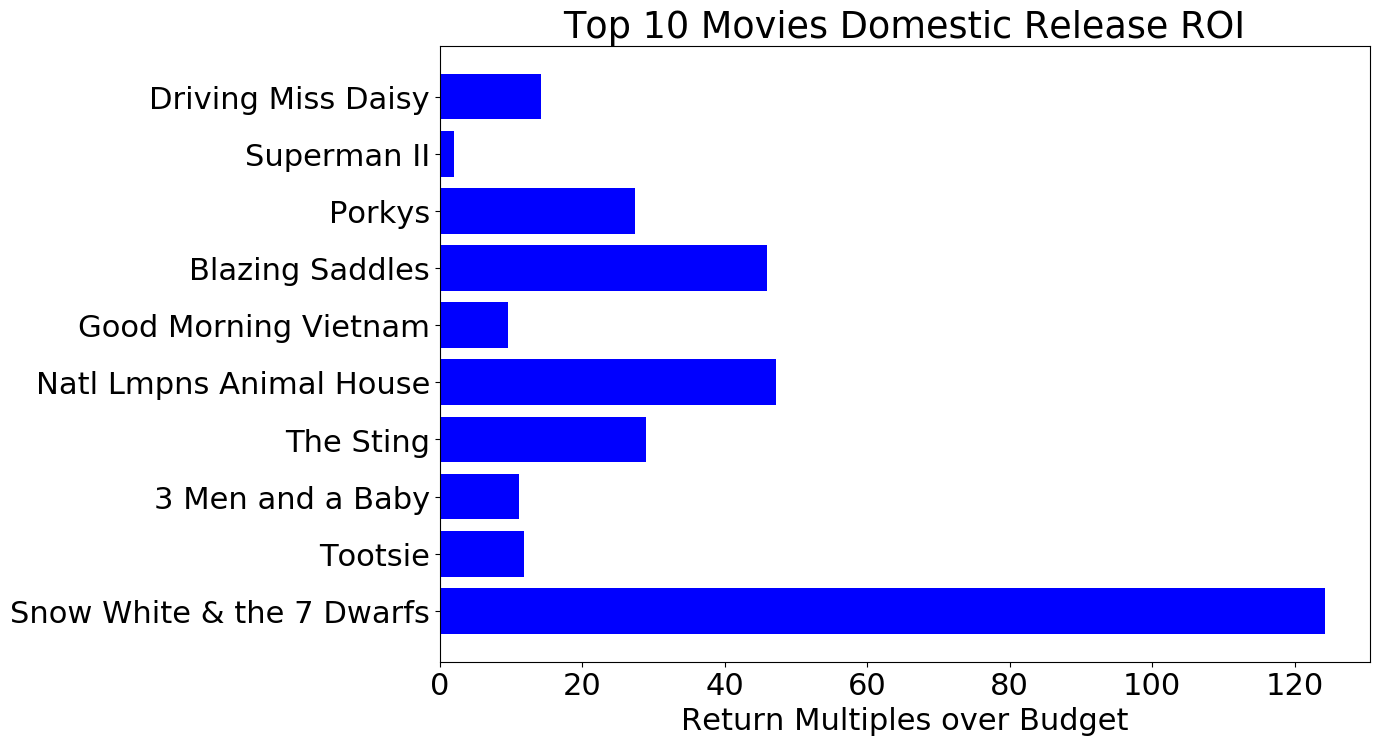

In [133]:
plt.figure(figsize=(12,8))
plt.barh(moviesdom, tnmovbuddomrroi, color = 'blue')
#plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 22})
#plt.legend(['Domestic Gross', 'Budget'])
plt.xlabel('Return Multiples over Budget')
#plt.savefig('top10dommovbud.png')
plt.title('Top 10 Movies Domestic Release ROI')
plt.show()


**to graph domestic collections vs budget for Domestic releases**

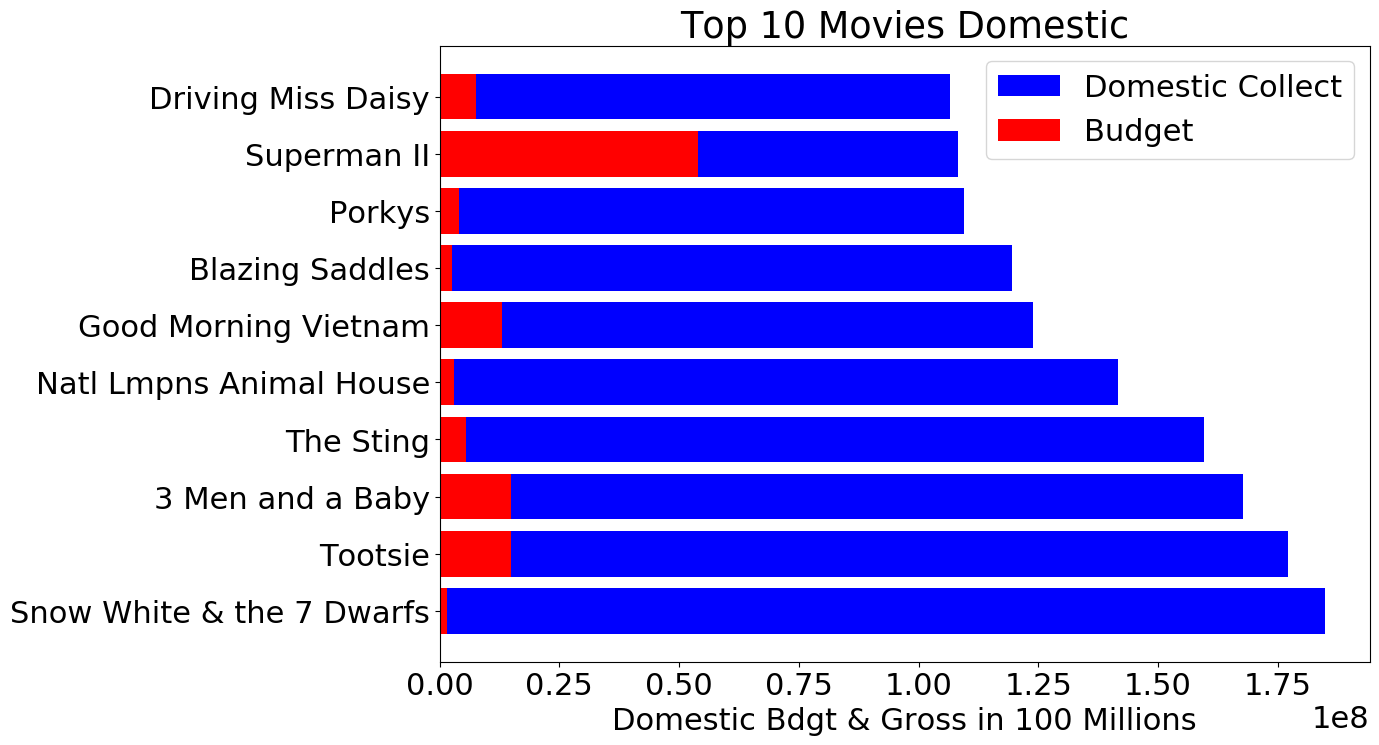

In [123]:

plt.figure(figsize=(12,8))
plt.barh(moviesdom, domesticdom, color = 'blue')
plt.barh(moviesdom, budgetdom, color = 'red')
#plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 22})
plt.legend(['Domestic Collect', 'Budget'])
plt.xlabel('Domestic Bdgt & Gross in 100 Millions')
plt.savefig('top10dommovbud.png')
plt.title('Top 10 Movies Domestic')
plt.show()


**to graph top ten worldwide releases over budget**


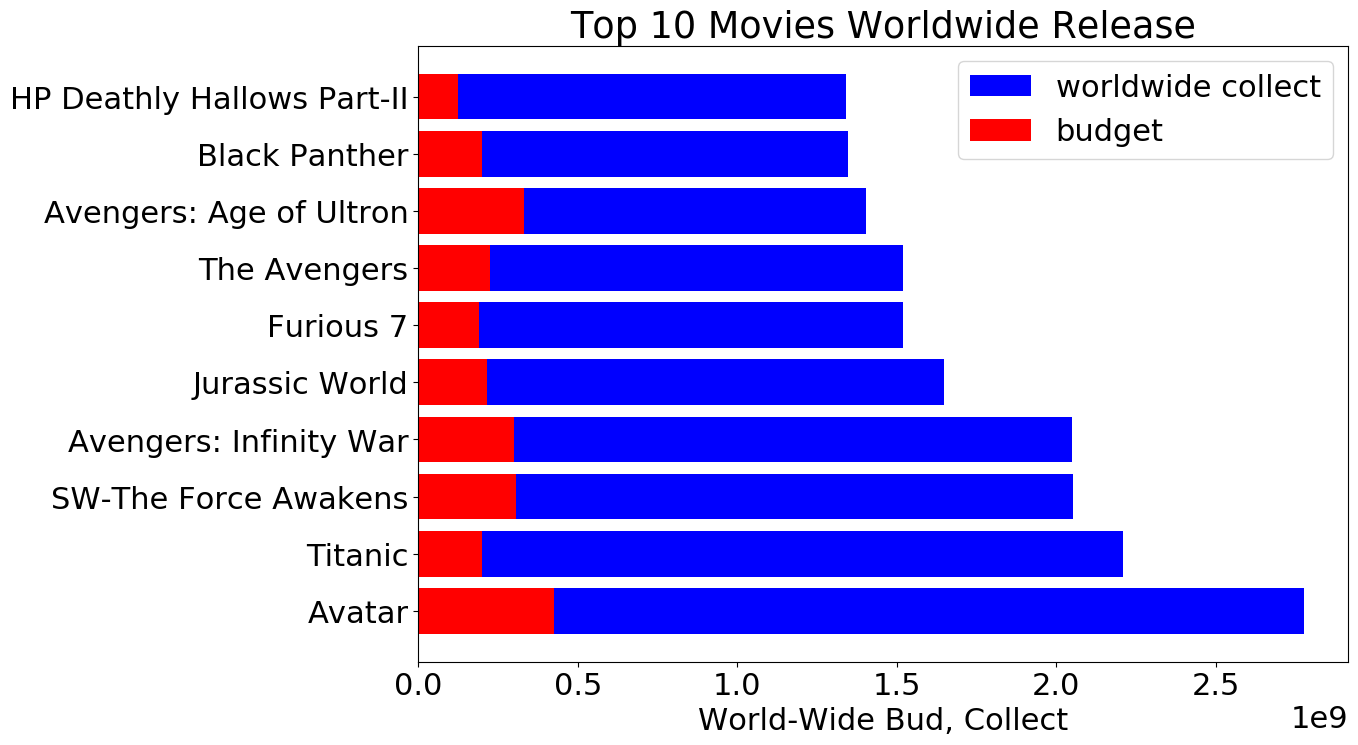

In [124]:

plt.figure(figsize = (12, 8))
movies = ['Avatar', 'Titanic', 'SW-The Force Awakens', 'Avengers: Infinity War', 'Jurassic World', 'Furious 7', 'The Avengers', 'Avengers: Age of Ultron', 'Black Panther', 'HP Deathly Hallows Part-II']
plt.rcParams.update({'font.size': 22})
plt.barh(movies, worldwide, color = 'blue')
plt.barh(movies, budget, color = 'red')

plt.legend(['worldwide collect', 'budget'])
plt.xlabel('World-Wide Bud, Collect')
plt.savefig('top10movbud.png')
plt.title('Top 10 Movies Worldwide Release')
plt.show()


**to graph top ten worldwide releases and their returns from domestic collections and worldwide collections**


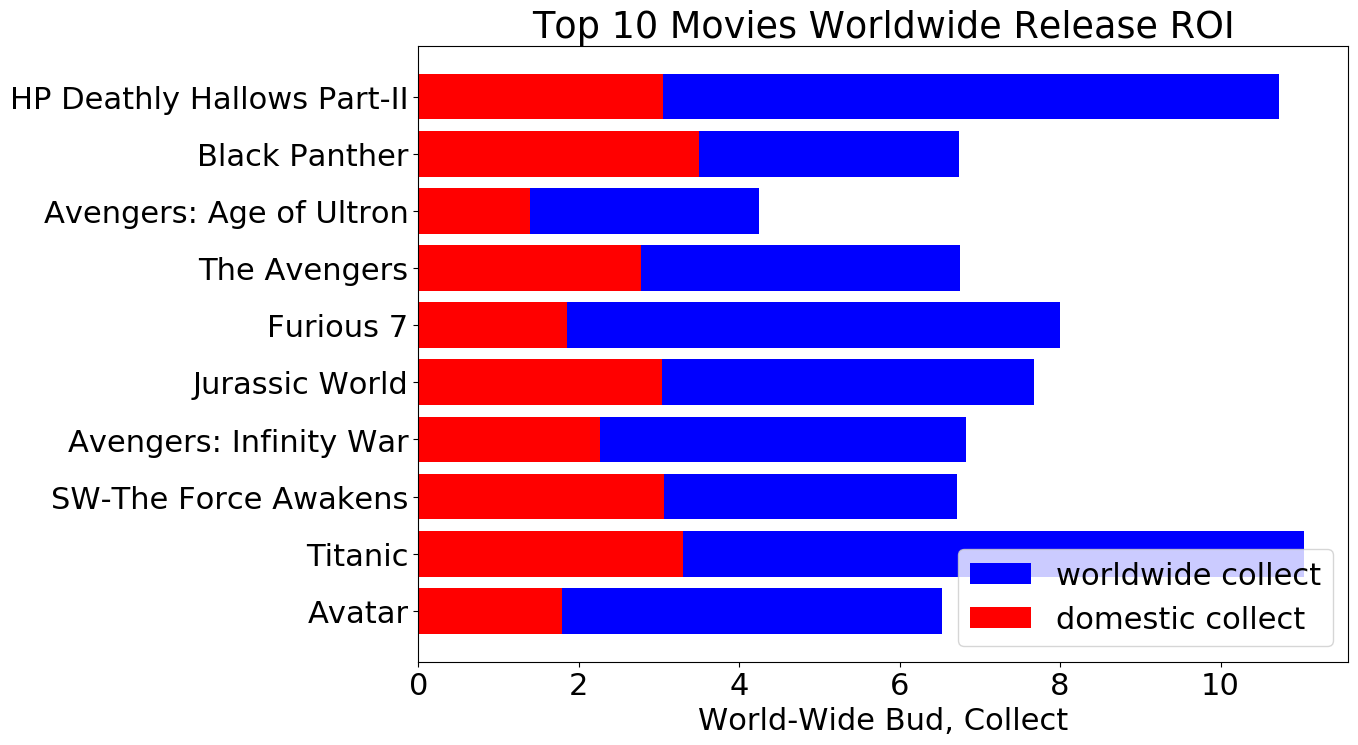

In [134]:
plt.figure(figsize = (12, 8))
movies = ['Avatar', 'Titanic', 'SW-The Force Awakens', 'Avengers: Infinity War', 'Jurassic World', 'Furious 7', 'The Avengers', 'Avengers: Age of Ultron', 'Black Panther', 'HP Deathly Hallows Part-II']
plt.rcParams.update({'font.size': 22})
plt.barh(movies, top10movieswwrwwroi, color = 'blue')
plt.barh(movies, top10movieswwrdmroi , color = 'red')

plt.legend(['worldwide collect', 'domestic collect'])
plt.xlabel('World-Wide Bud, Collect')
plt.savefig('top10movbud.png')
plt.title('Top 10 Movies Worldwide Release ROI')
plt.show()
